<a href="https://colab.research.google.com/github/JosuePerezValenzuela/AumentoDeImagenes/blob/master/AumentoImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Creo una carpeta en el colab
!mkdir FuxiaBoliviana

In [ ]:
#Descomprimir el .zip subido
%cd FuxiaBoliviana
!unzip Fuxia_boliviana.zip

In [ ]:
#Borrar los .zip iniciales
!rm -rf /content/FuxiaBoliviana/Fuxia_boliviana.zip

In [ ]:
!ls /content/fuxiaBoliviana | wc -l

93


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

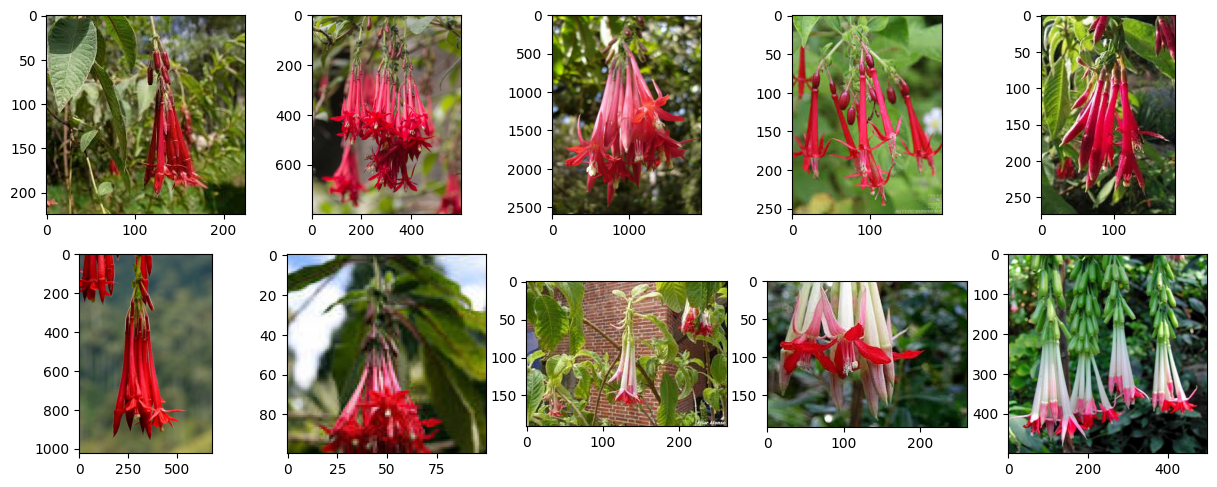

In [ ]:
#Mostrar algunas imagenes con pyplot

plt.figure(figsize=(15,15))

carpeta = '/content/fuxiaBoliviana'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:10]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
import shutil
carpeta_fuente = '/content/fuxiaBoliviana'
carpeta_destino = '/content/dataset/fuxia_boliviana'

imagenes = [f for f in os.listdir(carpeta_fuente) if os.path.isfile(os.path.join(carpeta_fuente, f))]

for i, nombreimg in enumerate(imagenes):
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls /content/dataset/fuxia_boliviana | wc -l

93


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Found 93 images belonging to 2 classes.


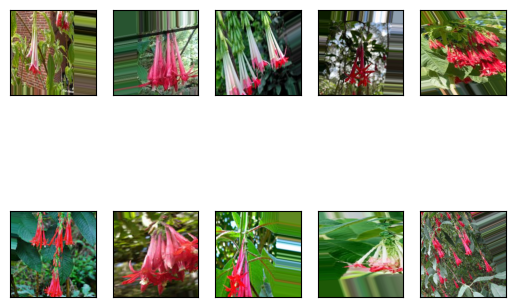

In [ ]:
#Aumento de datos

datagen = ImageDataGenerator(
    rescale = 1. / 255, #Valores entre 0-1 por cada pixel
    rotation_range = 30, #Angulo en grados para rotar la img
    width_shift_range = 0.25, #Maximo desplazamiento a lo ancho
    height_shift_range = 0.25, #Maximo desplazamiento a lo largo
    shear_range = 15, #Intensidad de la deformacion
    zoom_range = [0.5, 1.5] # Rango para hacer zoom
)
#                                                                redimension de la img
data_aumentada = datagen.flow_from_directory('/content/dataset', target_size=(224,224),batch_size=32, shuffle=True)

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_aumentada:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()
